<a href="https://colab.research.google.com/github/AndersonDeFaro/Estudos-Alura-Pyhton/blob/master/99-Generative_AI/Coletar_Dados_Cripto_Previs%C3%A3o_Simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dados Cripto

In [ ]:
!pip install ta

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import ta

In [ ]:
# Lista de criptomoedas
#
tickers = ["BTC-USD", "ETH-USD", "BNB-USD", "ADA-USD", "SOL-USD", "XRP-USD"]

# Data inicial e final
start_date = "2010-01-01"
end_date = "2024-06-30"

In [ ]:
# Função para calcular indicadores
def calculate_indicators(data):
    data['MMS_20'] = ta.trend.sma_indicator(data['Close'], window=20)
    data['RSI'] = ta.momentum.rsi(data['Close'], window=14)
    # Adicione outros indicadores aqui, como Bollinger Bands, MACD, etc.
    return data


In [ ]:
# Criar um DataFrame para armazenar os dados
all_data = pd.DataFrame()


In [ ]:
# Loop para obter os dados de cada criptomoeda e calcular os indicadores
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    data = calculate_indicators(data)
    data['Ticker'] = ticker
    all_data = pd.concat([all_data, data])


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import ta

# ... (resto do seu código)

def plotar_grafico(ticker, all_data):
    """
    Plota o gráfico de preço e média móvel simples (MMS) para uma criptomoeda específica.

    Args:
        ticker (str): O ticker da criptomoeda.
        all_data (pd.DataFrame): DataFrame contendo os dados de todas as criptomoedas.
    """

    # Filtra os dados da criptomoeda específica
    data = all_data[all_data['Ticker'] == ticker]

    # Cria o gráfico
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Preço de Fechamento')
    plt.plot(data['MMS_20'], label='MMS 20')
    plt.legend()
    plt.title(f"{ticker} - Preço e MMS 20")
    plt.show()


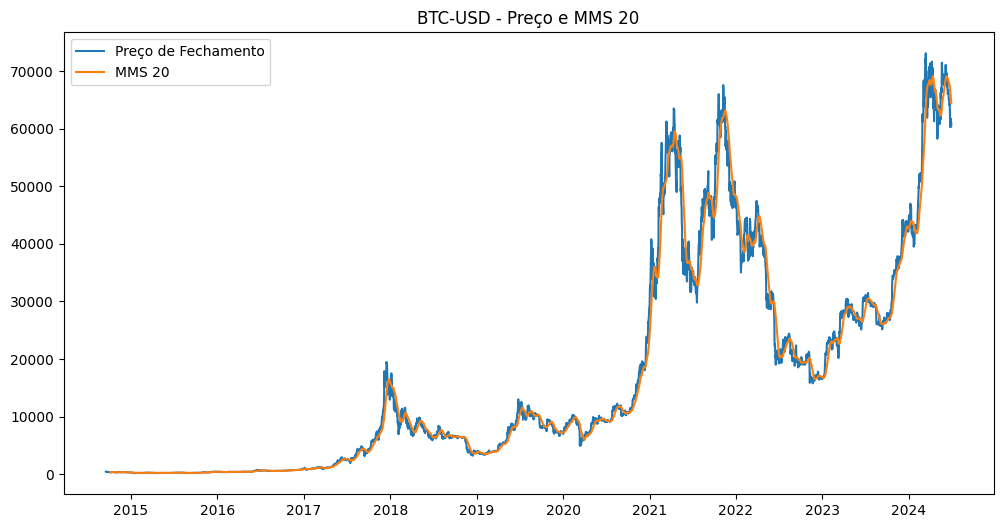

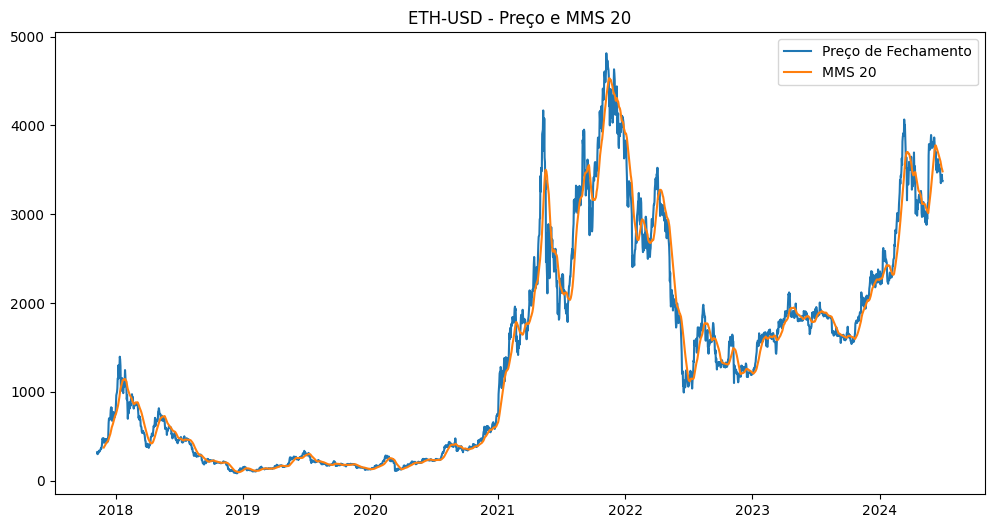

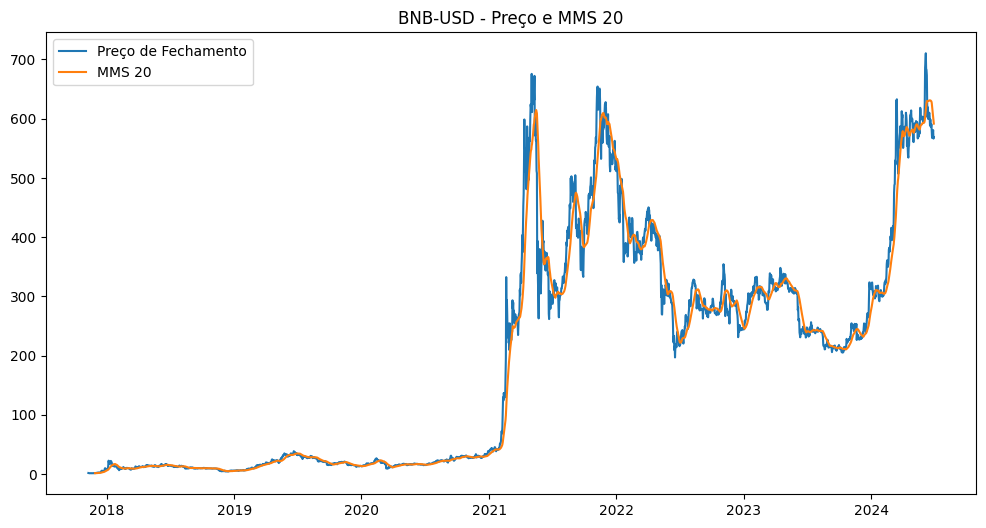

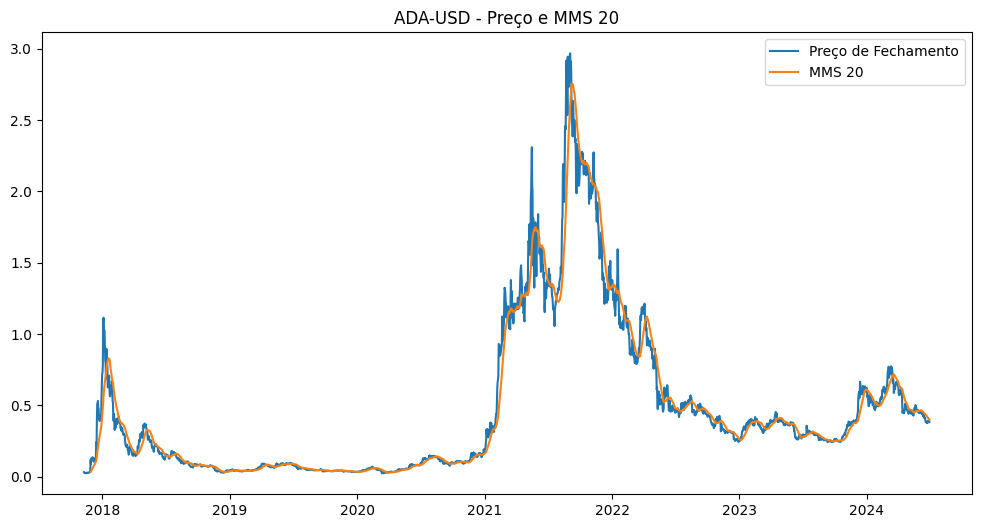

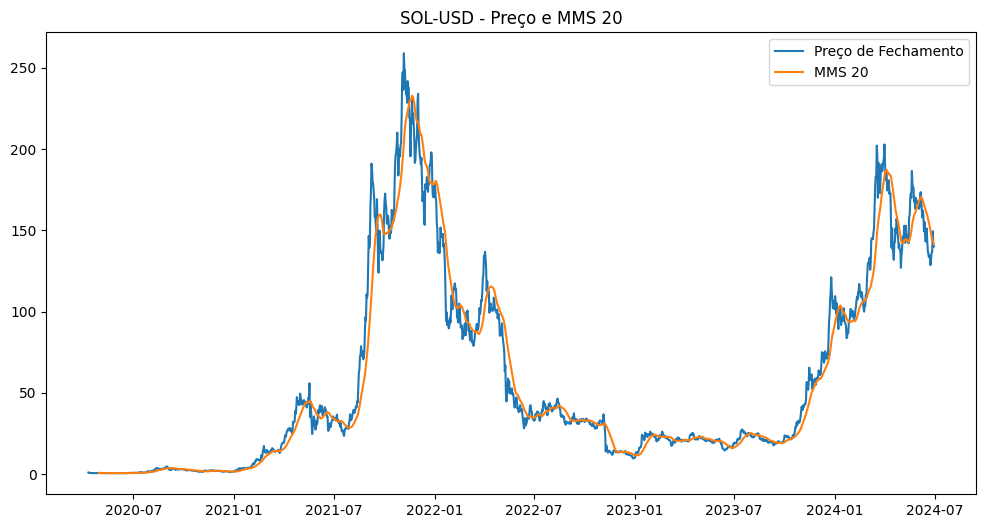

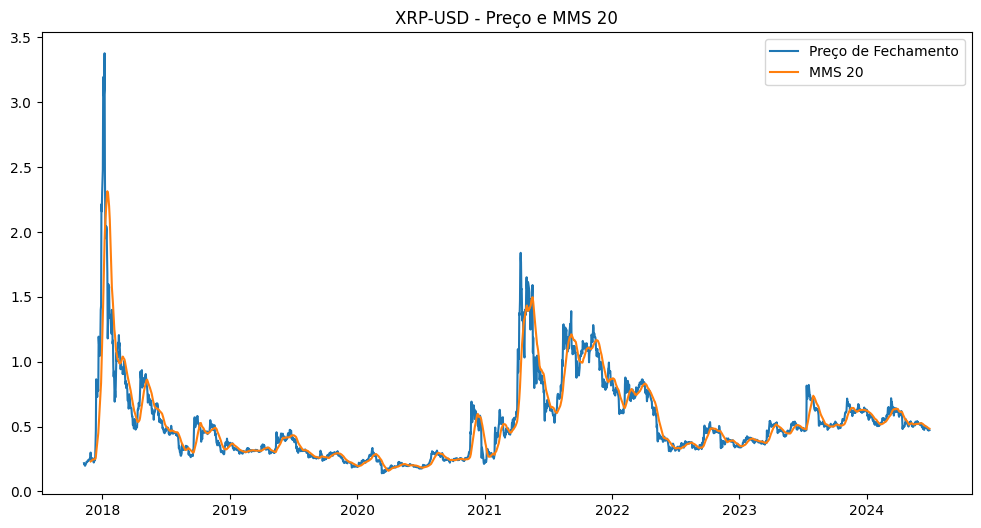

In [ ]:
for ticker in tickers:
    # Exemplo de uso:
    plotar_grafico(ticker, all_data)


## Machine Learning para prever compra de Criptomoedas

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [ ]:

# Assumindo que você já tem um DataFrame 'all_data' com as features e o target (preço futuro)
X = all_data.drop('Close', axis=1)  # Features
y = all_data['Close']  # Target (preço de fechamento)


In [ ]:

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)


In [ ]:
# Convert any string columns to numerical representations
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        # Use a suitable encoding method here, such as one-hot encoding or label encoding
        # Example using one-hot encoding:
        X_train = pd.get_dummies(X_train, columns=[col])

# Repeat the same conversion for X_test to maintain consistency
for col in X_test.columns:
    if X_test[col].dtype == 'object':
        X_test = pd.get_dummies(X_test, columns=[col])


In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train))
X_test_imputed = pd.DataFrame(imputer.transform(X_test))

# Set column names for the imputed dataframes
X_train_imputed.columns = X_train.columns
X_test_imputed.columns = X_test.columns


In [ ]:
# Now you can train the model using the imputed data
model.fit(X_train_imputed, y_train)

RandomForestRegressor(random_state=42)

### Modelo Preditivo

In [ ]:
# Fazer previsões
y_pred = model.predict(X_test_imputed)  # Use the imputed test data

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1649.9649057330498


### Modelo Regressão Lienar

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_imputed, y_train)
y_pred = model.predict(X_test_imputed)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Linear Regression):", mse)

Mean Squared Error (Linear Regression): 4.3507917963044703e-16


### Regressão Ridge

In [ ]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train_imputed, y_train)
y_pred = model.predict(X_test_imputed)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Ridge Regression):", mse)

Mean Squared Error (Ridge Regression): 2.4984380746330407e-13


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=5.42823e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


### Regressão Lasso

In [ ]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train_imputed, y_train)
y_pred = model.predict(X_test_imputed)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Lasso Regression):", mse)

Mean Squared Error (Lasso Regression): 41035.17206809603


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.118e+08, tolerance: 1.571e+08
  model = cd_fast.enet_coordinate_descent(


### Regressão Arvore

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train_imputed, y_train)
y_pred = model.predict(X_test_imputed)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Decision Tree):", mse)

Mean Squared Error (Decision Tree): 2491.0983299210034


### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train_imputed, y_train)
y_pred = model.predict(X_test_imputed)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Gradient Boosting):", mse)

Mean Squared Error (Gradient Boosting): 5526.575680199892
